In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train= pd.read_csv(r'E:\Big-Mart-Sales-Predicition-main\Big-Mart-Sales-Predicition-main\Dataset\Test.csv')
df_test= pd.read_csv(r'E:\Big-Mart-Sales-Predicition-main\Big-Mart-Sales-Predicition-main\Dataset\Test.csv')


In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
df_train.shape

(5681, 11)

In [5]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [6]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


### Item_Weight is numerical column so we fill it with Mean Imputation


In [9]:
df_train['Item_Weight'].describe()

count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64

In [10]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

C:\Users\debas\AppData\Local\Temp\ipykernel_15972\2875213604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
C:\Users\debas\AppData\Local\Temp\ipykernel_15972\2875213604.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [11]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
df_train['Item_Weight'].describe()

count    5681.000000
mean       12.695633
std         4.245189
min         4.555000
25%         9.195000
50%        12.695633
75%        15.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [13]:
df_train['Outlet_Size']

0       Medium
1          NaN
2          NaN
3          NaN
4       Medium
         ...  
5676     Small
5677    Medium
5678       NaN
5679       NaN
5680       NaN
Name: Outlet_Size, Length: 5681, dtype: object

In [14]:
df_train['Outlet_Size'].value_counts()

Outlet_Size
Medium    1862
Small     1592
High       621
Name: count, dtype: int64

In [15]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [16]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

C:\Users\debas\AppData\Local\Temp\ipykernel_15972\4104325985.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)


In [17]:
df_train.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [18]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Selecting features based on general requirements

In [19]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [20]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1


# EDA with Dtale Library

In [21]:
import dtale

In [22]:
dtale.show(df_train)

# EDA using Pandas Profiling

In [23]:
from ydata_profiling import ProfileReport

2025-04-21 20:32:40,627 - INFO     - Pandas backend loaded 2.2.3
2025-04-21 20:32:40,645 - INFO     - Numpy backend loaded 2.1.0
2025-04-21 20:32:40,645 - INFO     - Pyspark backend NOT loaded
2025-04-21 20:32:40,645 - INFO     - Python backend loaded


In [24]:
profile = ProfileReport(df_train, title="Big Mart Sales Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 10.76it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

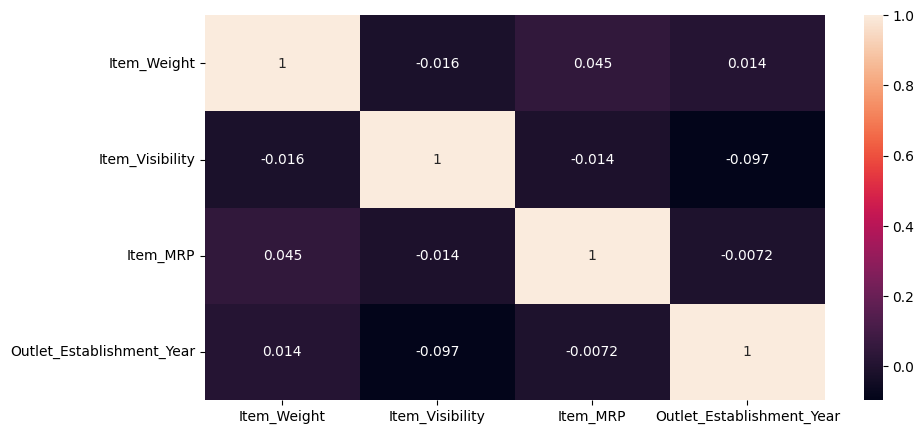

In [25]:
# Select only numeric columns
numeric_df = df_train.select_dtypes(include=['float64', 'int64'])

# Generate the heatmap for only numeric columns
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


# EDA using Klib Library

In [26]:
import klib

GridSpec(6, 5)

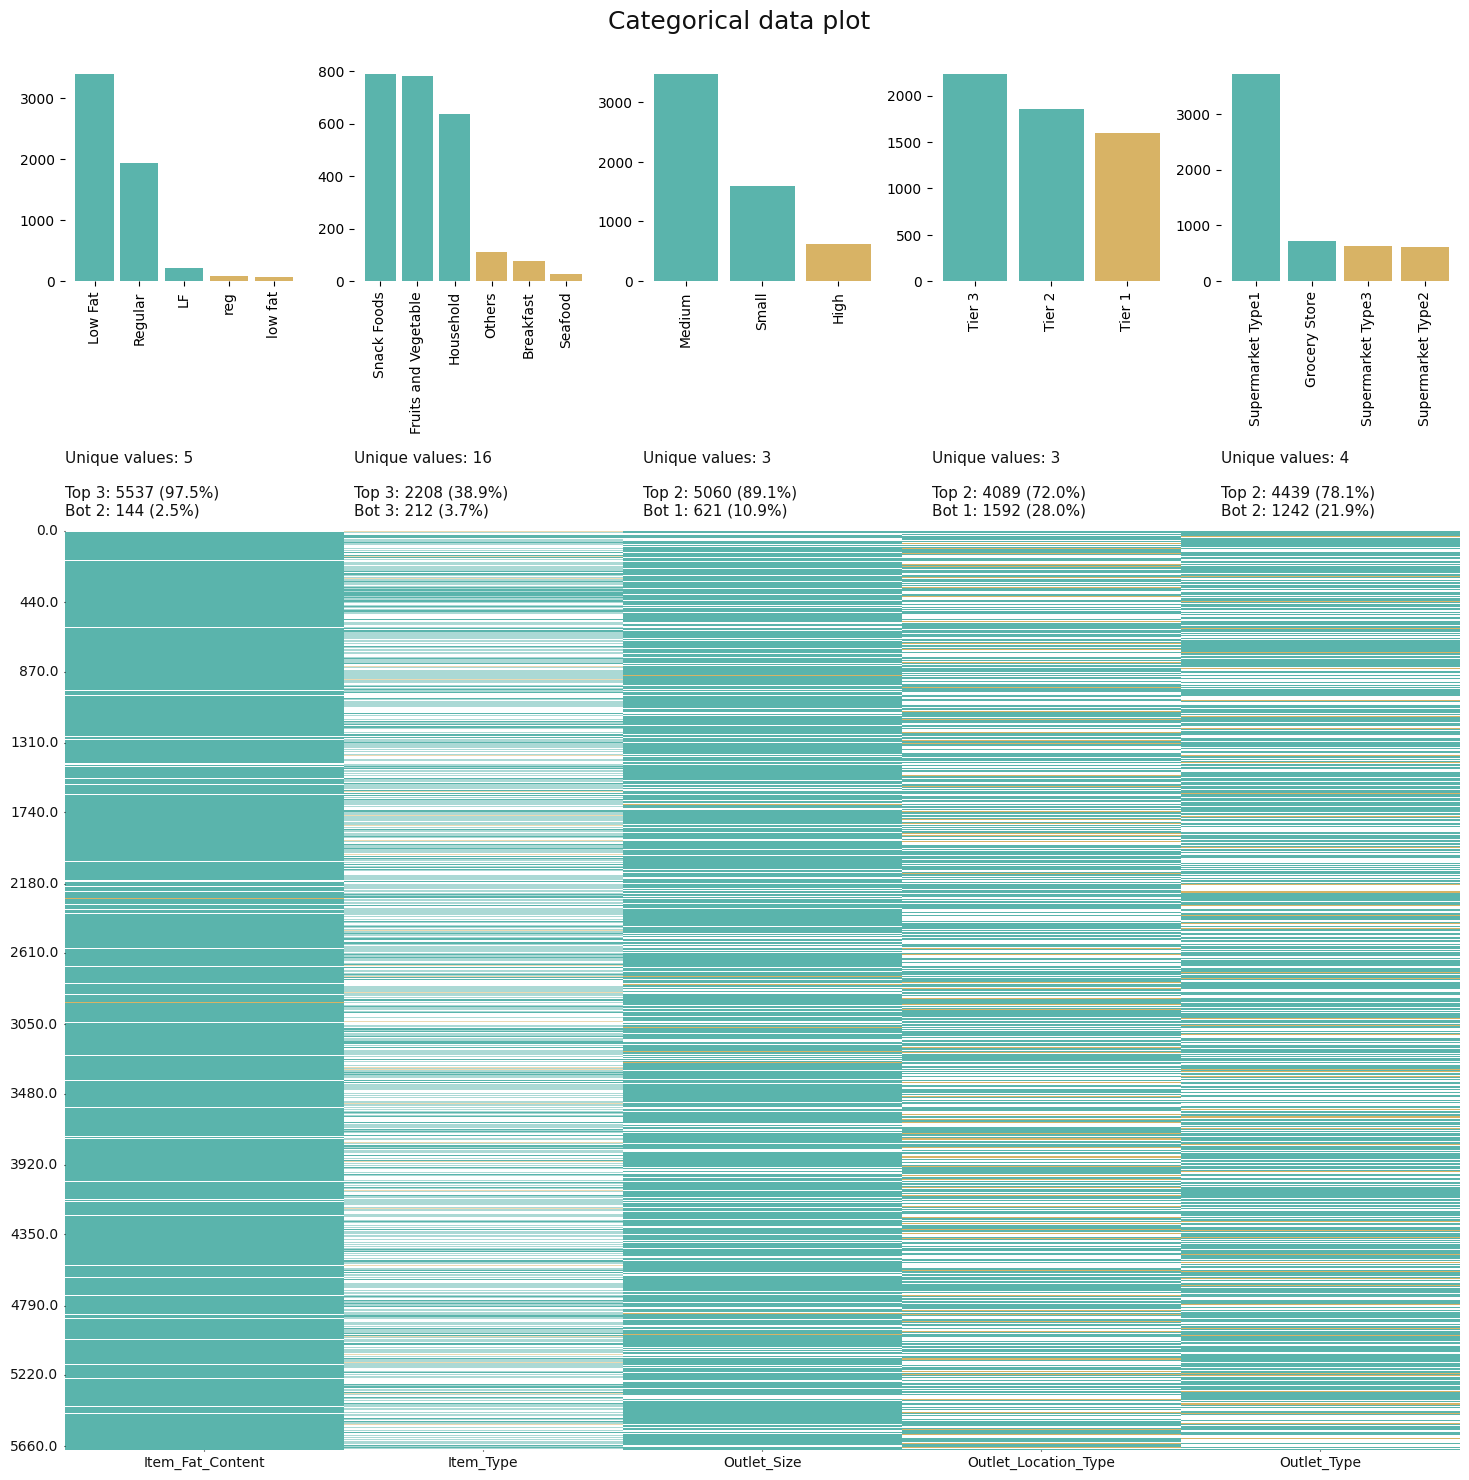

In [27]:
# klib.describe - functions for visualizing datasets
klib.cat_plot(df_train) # returns a visualization of the number and frequency of categorical features

In [28]:
klib.corr_mat(df_train) # returns a color-encoded correlation matrix

e:\Big-Mart-Sales-Predicition-main\Big-Mart-Sales-Predicition-main\.venv\Lib\site-packages\klib\describe.py:275: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.00,-0.02,0.05,0.01
Item_Visibility,-0.02,1.00,-0.01,-0.10
Item_MRP,0.05,-0.01,1.00,-0.01
Outlet_Establishment_Year,0.01,-0.10,-0.01,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

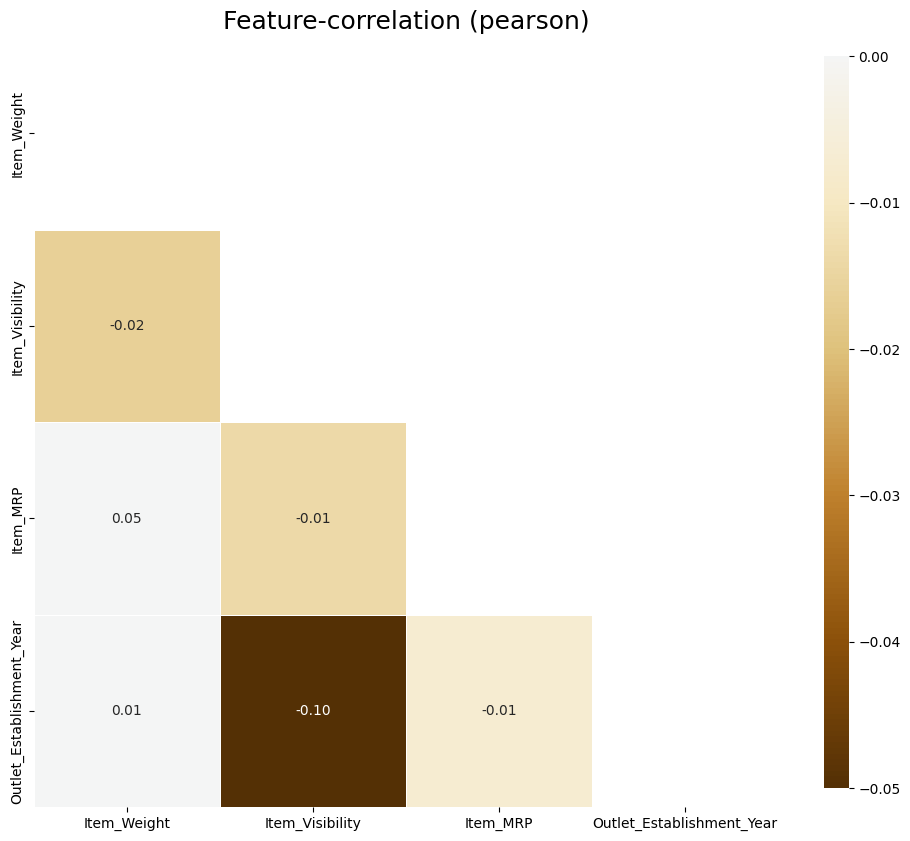

In [29]:
klib.corr_plot(df_train) # returns a color-encoded heatmap, ideal for correlations


<Axes: xlabel='Outlet_Establishment_Year', ylabel='Density'>

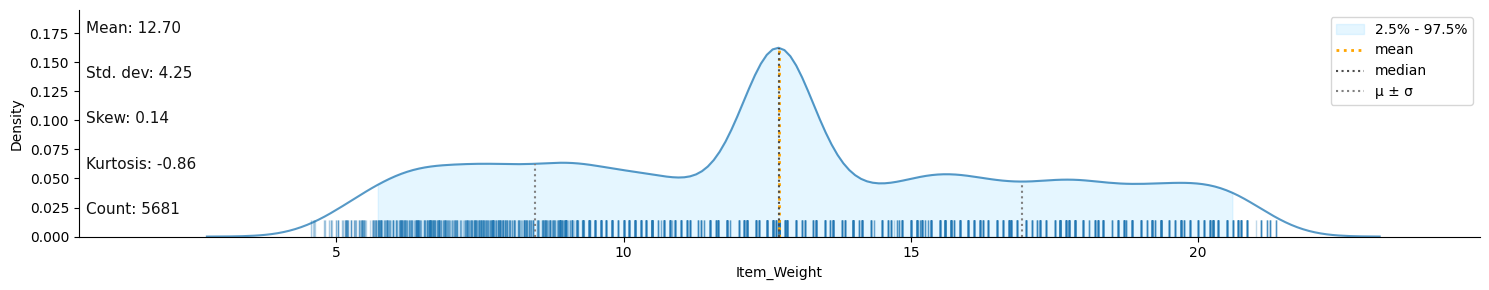

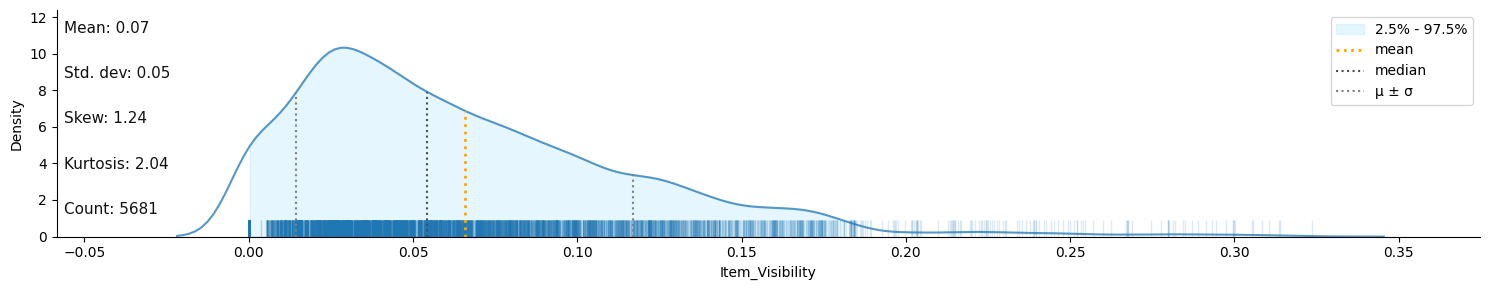

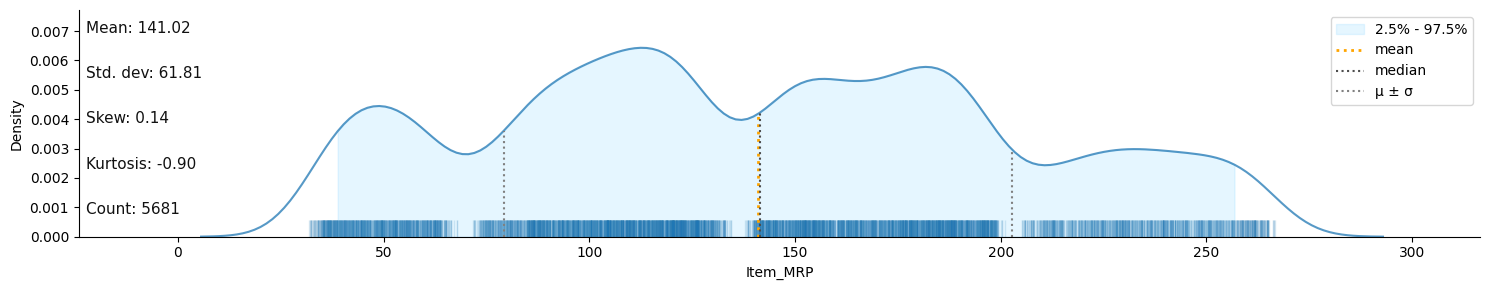

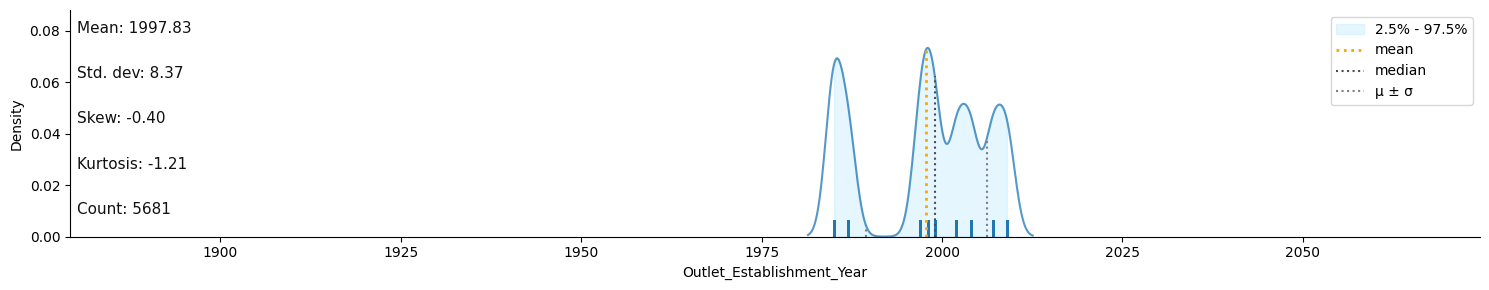

In [30]:
klib.dist_plot(df_train) # returns a distribution plot for every numeric feature


In [31]:
klib.missingval_plot(df_train) # returns a figure containing information about missing values


No missing values found in the dataset.


# Data Cleaning using Klib Library

In [32]:
# klib.clean - functions for cleaning datasets
klib.data_cleaning(df_train) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)

Shape of cleaned data: (5681, 9) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.29 MB (-74.36%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,20.750000,Low Fat,0.007565,Snack Foods,107.862198,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.319801,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.753799,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.033997,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.229996,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.315399,1997,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.142991,Starchy Foods,169.144806,2009,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.744003,2002,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.621796,2007,Medium,Tier 2,Supermarket Type1


In [33]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called inside data_cleaning()


,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1


In [34]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                5681 non-null   float64
 1   item_fat_content           5681 non-null   object 
 2   item_visibility            5681 non-null   float64
 3   item_type                  5681 non-null   object 
 4   item_mrp                   5681 non-null   float64
 5   outlet_establishment_year  5681 non-null   int64  
 6   outlet_size                5681 non-null   object 
 7   outlet_location_type       5681 non-null   object 
 8   outlet_type                5681 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 399.6+ KB


In [35]:
df_train=klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                5681 non-null   float32 
 1   item_fat_content           5681 non-null   category
 2   item_visibility            5681 non-null   float32 
 3   item_type                  5681 non-null   category
 4   item_mrp                   5681 non-null   float32 
 5   outlet_establishment_year  5681 non-null   int16   
 6   outlet_size                5681 non-null   category
 7   outlet_location_type       5681 non-null   category
 8   outlet_type                5681 non-null   category
dtypes: category(5), float32(3), int16(1)
memory usage: 106.9 KB


In [36]:
klib.mv_col_handling(df_train)


e:\Big-Mart-Sales-Predicition-main\Big-Mart-Sales-Predicition-main\.venv\Lib\site-packages\klib\clean.py:443: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,20.750000,Low Fat,0.007565,Snack Foods,107.862198,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.319801,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.753799,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.033997,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.229996,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.315399,1997,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.142991,Starchy Foods,169.144806,2009,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.744003,2002,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.621796,2007,Medium,Tier 2,Supermarket Type1


# Preprocessing Task before Model Building

# 1) Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [38]:
df_train['item_fat_content']= le.fit_transform(df_train['item_fat_content'])
df_train['item_type']= le.fit_transform(df_train['item_type'])
df_train['outlet_size']= le.fit_transform(df_train['outlet_size'])
df_train['outlet_location_type']= le.fit_transform(df_train['outlet_location_type'])
df_train['outlet_type']= le.fit_transform(df_train['outlet_type'])

In [39]:
df_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,20.750000,1,0.007565,13,107.862198,1999,1,0,1
1,8.300000,4,0.038428,4,87.319801,2007,1,1,1
2,14.600000,1,0.099575,11,241.753799,1998,1,2,0
3,7.315000,1,0.015388,13,155.033997,2007,1,1,1
4,12.695633,2,0.118599,4,234.229996,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,2,0.013496,13,141.315399,1997,2,0,1
5677,7.600000,2,0.142991,15,169.144806,2009,1,2,2
5678,10.000000,1,0.073529,8,118.744003,2002,1,1,1
5679,15.300000,2,0.000000,3,214.621796,2007,1,1,1


# 2) Splitting our data into train and test

In [40]:
print("Column names before cleaning:")
print(df_train.columns)

Column names before cleaning:
Index(['item_weight', 'item_fat_content', 'item_visibility', 'item_type',
       'item_mrp', 'outlet_establishment_year', 'outlet_size',
       'outlet_location_type', 'outlet_type'],
      dtype='object')


In [41]:
import pandas as pd

# Load training and test datasets
df_train = pd.read_csv('E:\Big-Mart-Sales-Predicition-main\Big-Mart-Sales-Predicition-main\Dataset\Train.csv')
df_test = pd.read_csv('E:\Big-Mart-Sales-Predicition-main\Big-Mart-Sales-Predicition-main\Dataset\Test.csv')

# Check column names in the training set
print("Column names in training data:", df_train.columns)

# Extract features (X) and target (y) from the training data
X_train = df_train.drop('Item_Outlet_Sales', axis=1)  # Features (drop target column)
y_train = df_train['Item_Outlet_Sales']  # Target

# Check the shape of features and target in the training data
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# For test data, we do not have the target variable, so just use the features
X_test = df_test  # Test set only has features, no target

# Check the features in the test data
print("Column names in test data:", df_test.columns)


Column names in training data: Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
Shape of X_train: (8523, 11)
Shape of y_train: (8523,)
Column names in test data: Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [46]:
# Check for missing values in the training dataset
print(X_train.isnull().sum())


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [43]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define categorical and numerical columns
categorical_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 
                       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 
                       'Outlet_Type']
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 
                     'Outlet_Establishment_Year']

# Create transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Impute missing values with the mean
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent category
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # OneHotEncoder for categorical variables
])

# Create the column transformer that applies different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create the full pipeline with preprocessing and model fitting
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())  # Model: Linear Regression
])

# Train-test split for model evaluation (optional, for validation)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model using the pipeline
pipeline.fit(X_train_split, y_train_split)

# Make predictions on the validation set (optional)
y_val_pred = pipeline.predict(X_val_split)

# Evaluate the model (e.g., Mean Squared Error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val_split, y_val_pred)
print("Validation Mean Squared Error:", mse)


Validation Mean Squared Error: 1606372.128716451


In [44]:
import numpy as np
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 1267.4273662488322


In [45]:
# If 'item_outlet_sales' doesn't exist, just skip the drop operation
if 'item_outlet_sales' in df_train.columns:
    X = df_train.drop('item_outlet_sales', axis=1)
    print("Dropped 'item_outlet_sales' column")
else:
    X = df_train  # No need to drop anything if the column is missing
    print("'item_outlet_sales' column not found")


'item_outlet_sales' column not found


In [48]:
X = df_train.drop('Item_Outlet_Sales', axis=1)


In [50]:
# Case-insensitive column access (useful in debugging)
target_col = [col for col in df_train.columns if col.lower() == 'item_outlet_sales']
print(target_col)  # Should return ['Item_Outlet_Sales']


['Item_Outlet_Sales']


In [52]:
print(df_train.columns)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [53]:
X = df_train.drop('Item_Outlet_Sales', axis=1)
Y = df_train['Item_Outlet_Sales']


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=101, test_size=0.2)


# 3) Standarization

In [55]:
X.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867
std,4.643456,0.051598,62.275067,8.371760
min,4.555000,0.000000,31.290000,1985.000000
25%,8.773750,0.026989,93.826500,1987.000000
50%,12.600000,0.053931,143.012800,1999.000000
75%,16.850000,0.094585,185.643700,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
sc= StandardScaler()

In [58]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1. Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(exclude=['object']).columns

# 2. Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# 3. Combine into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# 4. Fit and transform training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [64]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Separate categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Apply transformations
X_train_std = preprocessor.fit_transform(X_train)
X_test_std = preprocessor.transform(X_test)


In [71]:
import joblib
joblib.dump(preprocessor, 'models/preprocessor_pipeline.sav')


['models/preprocessor_pipeline.sav']

In [65]:
X_train_std

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 74998 stored elements and shape (6818, 1598)>

In [66]:
X_test_std

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 18745 stored elements and shape (1705, 1598)>

In [63]:
Y_train

3684     163.7868
1935    1607.2412
5142    1510.0344
4978    1784.3440
2299    3558.0352
          ...    
599     5502.8370
5695    1436.7964
8006    2167.8448
1361    2700.4848
1547     829.5868
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [67]:
Y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [68]:
import joblib

In [72]:
from sklearn.linear_model import LinearRegression

# 1. Create and train the model
lr = LinearRegression()
lr.fit(X_train_std, Y_train)

# 2. Save the model using joblib
import joblib
joblib.dump(lr, r'E:\Big-Mart-Sales-Predicition-main\Big-Mart-Sales-Predicition-main\models\lr.sav')


['E:\\Big-Mart-Sales-Predicition-main\\Big-Mart-Sales-Predicition-main\\models\\lr.sav']

In [73]:
joblib.dump(preprocessor, r'E:\Big-Mart-Sales-Predicition-main\Big-Mart-Sales-Predicition-main\models\sc.sav')


['E:\\Big-Mart-Sales-Predicition-main\\Big-Mart-Sales-Predicition-main\\models\\sc.sav']

In [76]:
import os
import joblib

joblib.dump(lr, os.path.join('models', 'lr.sav'))
joblib.dump(preprocessor, os.path.join('models', 'sc.sav'))


['models\\sc.sav']

In [75]:
# After training your models, save them like this:
joblib.dump(sc, r'E:\Big-Mart-Sales-Predicition-main\Big-Mart-Sales-Predicition-main\models\sc.sav')
joblib.dump(lr, r'E:\Big-Mart-Sales-Predicition-main\Big-Mart-Sales-Predicition-main\models\lr.sav')

['E:\\Big-Mart-Sales-Predicition-main\\Big-Mart-Sales-Predicition-main\\models\\lr.sav']

# Model building

In [77]:
X_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8179,NCN17,11.00,Low Fat,0.055163,Health and Hygiene,100.3358,OUT018,2009,Medium,Tier 3,Supermarket Type2
8355,FDW45,18.00,Low Fat,0.038979,Snack Foods,148.6418,OUT013,1987,High,Tier 3,Supermarket Type1
3411,FDT23,7.72,Regular,0.074731,Breads,77.5986,OUT046,1997,Small,Tier 1,Supermarket Type1
7089,FDE32,20.70,Low Fat,0.049035,Fruits and Vegetables,39.9506,OUT017,2007,NaN,Tier 2,Supermarket Type1
6954,FDF14,7.55,Low Fat,0.027225,Canned,152.9340,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [78]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [80]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [81]:
Y_pred_lr=lr.predict(X_test_std)

In [82]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.38212203632741204
980.4707490886024
1297.6682224775986


In [83]:
# After training your models, save them like this:
joblib.dump(sc, r'E:\Big-Mart-Sales-Predicition-main\Big-Mart-Sales-Predicition-main\models\sc.sav')
joblib.dump(lr, r'E:\Big-Mart-Sales-Predicition-main\Big-Mart-Sales-Predicition-main\models\lr.sav')

['E:\\Big-Mart-Sales-Predicition-main\\Big-Mart-Sales-Predicition-main\\models\\lr.sav']

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [85]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [86]:
Y_pred_rf= rf.predict(X_test_std)

In [87]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.5514068613492225
779.6912895547212
1105.7033610097217


In [88]:
# After training your models, save them like this:
joblib.dump(sc, r'E:\Big-Mart-Sales-Predicition-main\Big-Mart-Sales-Predicition-main\models\sc.sav')
joblib.dump(lr, r'E:\Big-Mart-Sales-Predicition-main\Big-Mart-Sales-Predicition-main\models\lr.sav')

['E:\\Big-Mart-Sales-Predicition-main\\Big-Mart-Sales-Predicition-main\\models\\lr.sav']

# XG Boost Regressor

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Load the training data
df = pd.read_csv('E:/Big-Mart-Sales-Predicition-main/Big-Mart-Sales-Predicition-main/Dataset/Train.csv')

# Check the column names to identify the correct target column
print(df.columns)

# Assuming 'Item_Outlet_Sales' is the target column (adjust this if the column name differs)
X = df.drop('Item_Outlet_Sales', axis=1)  # Features (remove target column)
Y = df['Item_Outlet_Sales']  # Target variable

# Handle categorical columns (convert them to numerical values using Label Encoding or One-Hot Encoding)
categorical_cols = X.select_dtypes(include=['object']).columns

# For label encoding of categorical variables
label_encoder = LabelEncoder()

for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features (important for XGBoost)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Initialize the XGBoost regressor model
xg = XGBRegressor()

# Fit the model on the training data
xg.fit(X_train_std, Y_train)

# Predict on the test data
Y_pred = xg.predict(X_test_std)

# Calculate Mean Squared Error as a performance metric
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
Mean Squared Error: 1305728.7394422346


In [9]:
from xgboost import XGBRegressor
xg= XGBRegressor()

In [10]:
xg.fit(X_train_std, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [11]:
Y_pred_xg=xg.predict(X_test_std)

In [13]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Assuming Y_pred_xg is the prediction from the XGBoost model
print(r2_score(Y_test, Y_pred_xg))
print(mean_absolute_error(Y_test, Y_pred_xg))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_xg)))


0.5195941428937144
799.3636420883678
1142.6848819522531


In [21]:
from sklearn.impute import SimpleImputer

# Initialize the imputer (using mean strategy)
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the dataset (for both features and target)
X_imputed = imputer.fit_transform(X)  # This will impute the features
Y_imputed = imputer.fit_transform(Y.values.reshape(-1, 1))  # Impute the target column as well

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_imputed, Y_imputed, test_size=0.2, random_state=42)

# Standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Initialize and train the model (e.g., Linear Regression)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_std, Y_train)

# Save the models
import joblib
joblib.dump(sc, r'E:\Big-Mart-Sales-Predicition-main\Big-Mart-Sales-Predicition-main\models\sc.sav')
joblib.dump(lr, r'E:\Big-Mart-Sales-Predicition-main\Big-Mart-Sales-Predicition-main\models\lr.sav')


['E:\\Big-Mart-Sales-Predicition-main\\Big-Mart-Sales-Predicition-main\\models\\lr.sav']

# Hyper parameter tuning

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define model
model = RandomForestRegressor()

# Define parameter grid
param_dist = {
    'n_estimators': [10, 100, 1000],
    'max_depth': range(1, 31),
    'min_samples_leaf': np.linspace(0.1, 1.0, 10),
    'max_features': ["auto", "sqrt", "log2"],
    'min_samples_split': np.linspace(0.1, 1.0, 10)
}

# RandomizedSearchCV with 3-fold cross-validation
random_search_forest = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,  # Randomly sample 10 combinations of hyperparameters
    n_jobs=-1,
    scoring='r2',
    verbose=2,
    cv=2,
    random_state=42
)

# Fit the model
random_search_forest.fit(X_train_std, Y_train)

# Summarize results
print(f"Best: {random_search_forest.best_score_:.3f} using {random_search_forest.best_params_}")
means = random_search_forest.cv_results_['mean_test_score']
stds = random_search_forest.cv_results_['std_test_score']
params = random_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")


Fitting 2 folds for each of 10 candidates, totalling 20 fits


KeyboardInterrupt: 

In [26]:
# Ensure fit is done first
grid_search_forest.fit(X_train_std, Y_train)

# After fitting, access the best parameters and score
print("Best Score:", grid_search_forest.best_score_)
print("Best Parameters:", grid_search_forest.best_params_)


Fitting 2 folds for each of 135000 candidates, totalling 270000 fits


KeyboardInterrupt: 

In [33]:
grid_search_forest.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [32]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [31]:
r2_score(Y_test,Y_pred_rf_grid)

NameError: name 'Y_pred_rf_grid' is not defined

# Save the model

In [27]:
import joblib

In [28]:
# After training your models, save them like this:
joblib.dump(sc, r'E:\Big-Mart-Sales-Predicition-main\Big-Mart-Sales-Predicition-main\models\sc.sav')
joblib.dump(lr, r'E:\Big-Mart-Sales-Predicition-main\Big-Mart-Sales-Predicition-main\models\lr.sav')

['E:\\Big-Mart-Sales-Predicition-main\\Big-Mart-Sales-Predicition-main\\models\\lr.sav']

In [30]:
import joblib

# Load the saved models using the correct file paths
sc = joblib.load(r'E:\Big-Mart-Sales-Predicition-main\Big-Mart-Sales-Predicition-main\models\sc.sav')
lr = joblib.load(r'E:\Big-Mart-Sales-Predicition-main\Big-Mart-Sales-Predicition-main\models\lr.sav')
